# 🛍️ Customer Segmentation using K-Means
---

**Project:** Mall Customer Segmentation  
**Author:** Aliaa Mohamed  
**Date:** 2026  

---

In [1]:
# Import Libraries
# =========================================
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Machine Learning
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Settings
import warnings
warnings.filterwarnings('ignore')

# Plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [ ]:
# Load & Preview Dataset
import pandas as pd

df = pd.read_csv('../data/Mall_Customers.csv')

# Display first rows
print("=" * 60)
print("📊 DATASET PREVIEW")
print("=" * 60)
display(df.head(10))

print("\n" + "=" * 60)
print("📈 DATASET INFO")
print("=" * 60)
print(df.info())

print("\n" + "=" * 60)
print("📉 STATISTICAL SUMMARY")
print("=" * 60)
display(df.describe())

print(f"\n✅ Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")


📊 DATASET PREVIEW


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72



📈 DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

📉 STATISTICAL SUMMARY


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000



✅ Dataset loaded: 200 rows, 5 columns


In [7]:
#Exploratory Data Analysis (EDA)
# =========================================

# Check for missing values
print("=" * 60)
print("🔍 MISSING VALUES CHECK")
print("=" * 60)
print(df.isnull().sum())

# Check data types
print("\n" + "=" * 60)
print("🔢 DATA TYPES")
print("=" * 60)
print(df.dtypes)

# Gender distribution
print("\n" + "=" * 60)
print("👥 GENDER DISTRIBUTION")
print("=" * 60)
print(df['Gender'].value_counts())

🔍 MISSING VALUES CHECK
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

🔢 DATA TYPES
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

👥 GENDER DISTRIBUTION
Gender
Female    112
Male       88
Name: count, dtype: int64


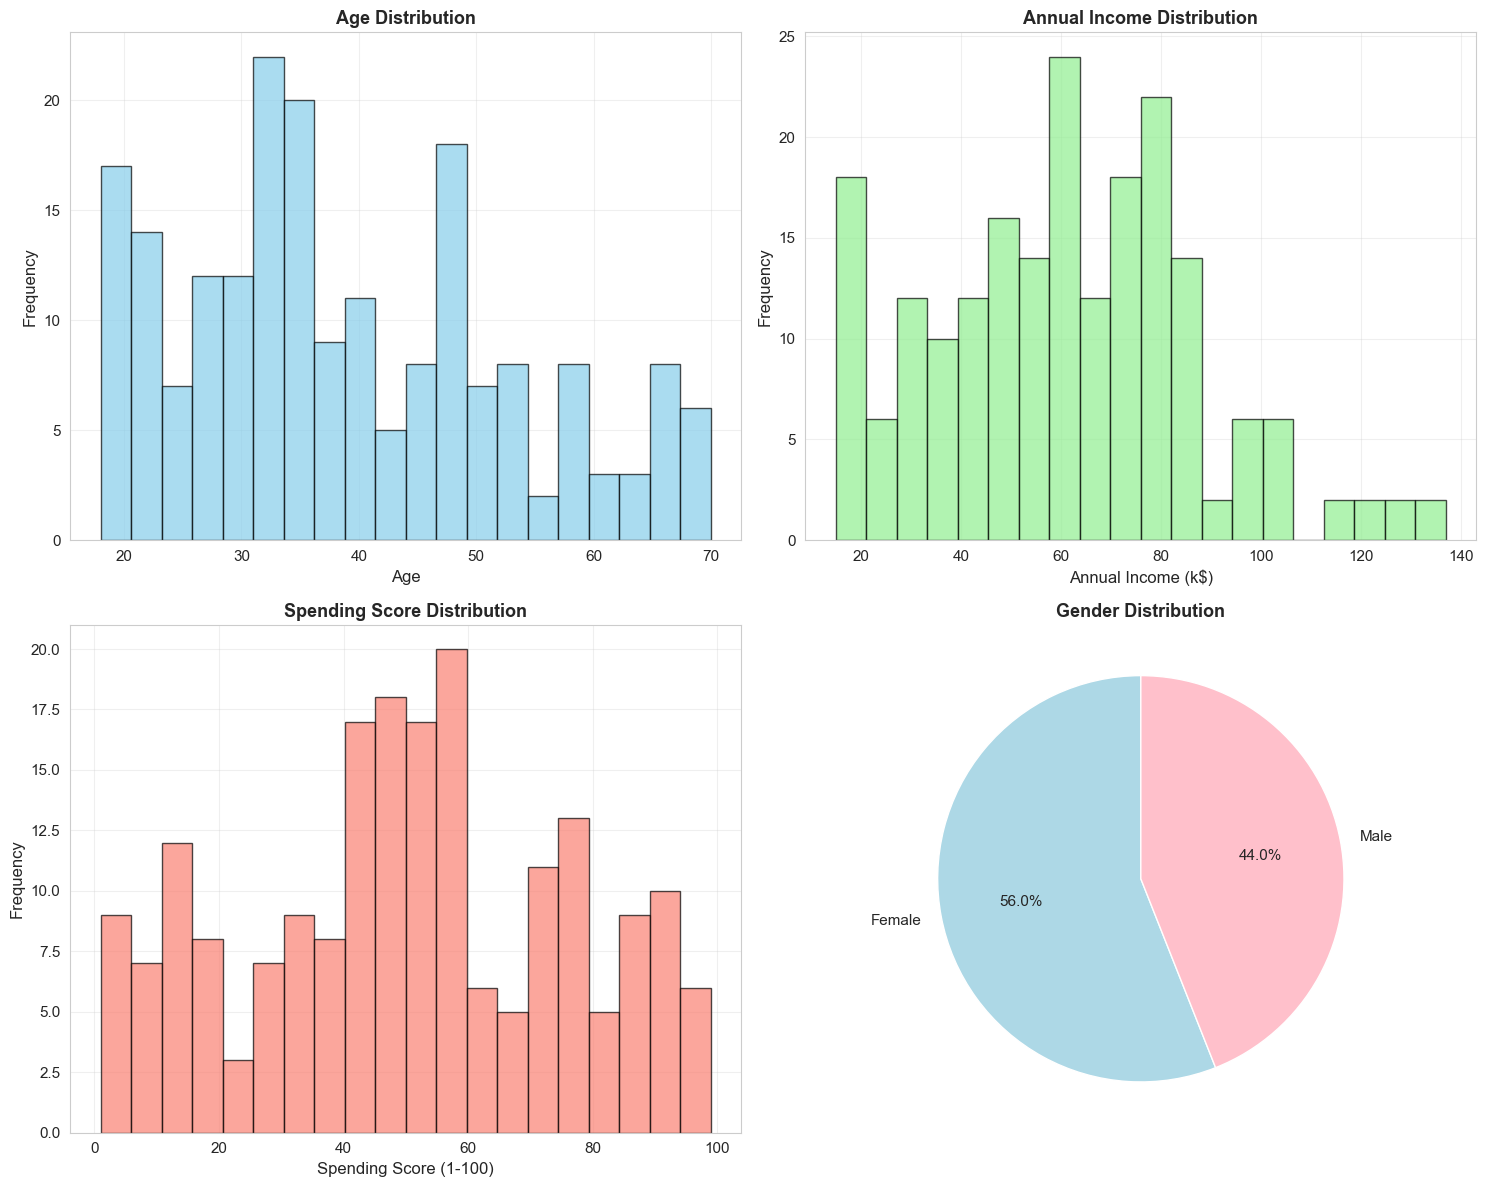

✅ EDA visualizations saved!


In [10]:
# Data Visualization (Before Clustering)
# =========================================

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Age Distribution
axes[0, 0].hist(df['Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Age', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Age Distribution', fontsize=13, weight='bold')
axes[0, 0].grid(alpha=0.3)

# 2. Annual Income Distribution
axes[0, 1].hist(df['Annual Income (k$)'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Annual Income (k$)', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].set_title('Annual Income Distribution', fontsize=13, weight='bold')
axes[0, 1].grid(alpha=0.3)

# 3. Spending Score Distribution
axes[1, 0].hist(df['Spending Score (1-100)'], bins=20, color='salmon', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Spending Score (1-100)', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_title('Spending Score Distribution', fontsize=13, weight='bold')
axes[1, 0].grid(alpha=0.3)

# 4. Gender Distribution (Pie Chart)
gender_counts = df['Gender'].value_counts()
axes[1, 1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'pink'], startangle=90)
axes[1, 1].set_title('Gender Distribution', fontsize=13, weight='bold')

plt.tight_layout()
plt.savefig('../outputs/eda_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ EDA visualizations saved!")

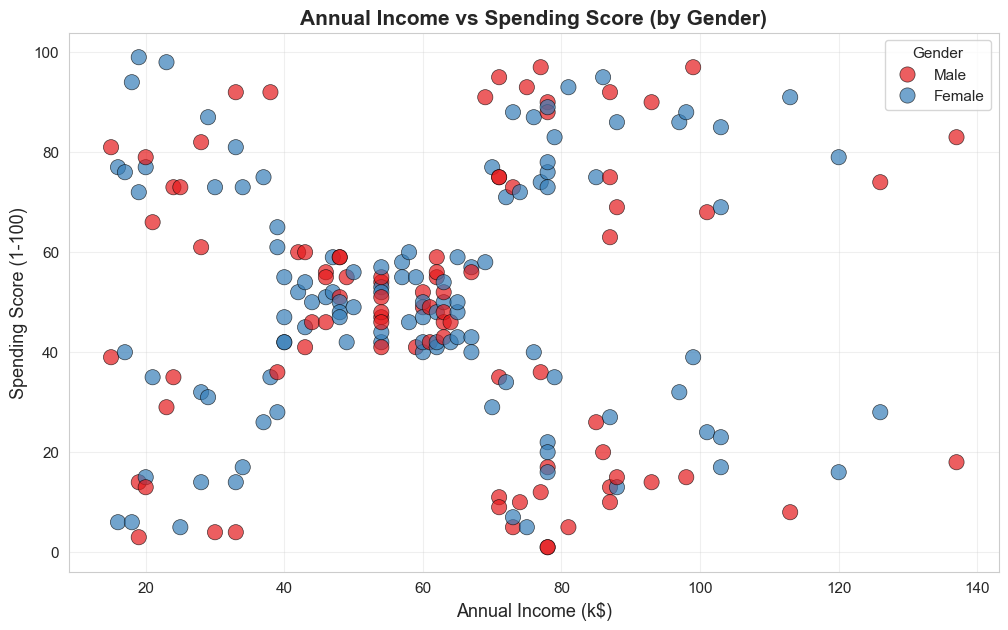

✅ Scatter plot saved!


In [12]:
# Income vs Spending (Scatter Plot)
# =========================================

plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df, 
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    hue='Gender', 
    palette='Set1', 
    s=120, 
    alpha=0.7,
    edgecolor='black',
    linewidth=0.5
)
plt.title('Annual Income vs Spending Score (by Gender)', fontsize=15, weight='bold')
plt.xlabel('Annual Income (k$)', fontsize=13)
plt.ylabel('Spending Score (1-100)', fontsize=13)
plt.legend(title='Gender', fontsize=11)
plt.grid(alpha=0.3)
plt.savefig('../outputs/income_vs_spending.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Scatter plot saved!")

In [13]:
# Data Preprocessing
# =========================================
# Select features for clustering
# use : Age, Annual Income, Spending Score
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].values

print("=" * 60)
print("🔧 DATA PREPROCESSING")
print("=" * 60)
print(f"Selected features: {features}")
print(f"Shape of X: {X.shape}")

# Standardization (important for K-Means!)
# K-Means is sensitive to the scale of the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n✅ Data standardized (mean=0, std=1)")
print(f"Shape of X_scaled: {X_scaled.shape}")

# Preview scaled data
print("\n" + "=" * 60)
print("📊 ORIGINAL vs SCALED DATA (First 5 rows)")
print("=" * 60)
comparison_df = pd.DataFrame({
    'Age_Original': X[:5, 0],
    'Age_Scaled': X_scaled[:5, 0],
    'Income_Original': X[:5, 1],
    'Income_Scaled': X_scaled[:5, 1],
    'Spending_Original': X[:5, 2],
    'Spending_Scaled': X_scaled[:5, 2]
})
display(comparison_df)

🔧 DATA PREPROCESSING
Selected features: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Shape of X: (200, 3)

✅ Data standardized (mean=0, std=1)
Shape of X_scaled: (200, 3)

📊 ORIGINAL vs SCALED DATA (First 5 rows)


,Age_Original,Age_Scaled,Income_Original,Income_Scaled,Spending_Original,Spending_Scaled
0,19,-1.424569,15,-1.738999,39,-0.434801
1,21,-1.281035,15,-1.738999,81,1.195704
2,20,-1.352802,16,-1.700830,6,-1.715913
3,23,-1.137502,16,-1.700830,77,1.040418
4,31,-0.563369,17,-1.662660,40,-0.395980


In [14]:
# Elbow Method (Finding Optimal K)
# =========================================
print("=" * 60)
print("📐 ELBOW METHOD - Finding Optimal Number of Clusters")
print("=" * 60)

# Calculate Inertia and Silhouette Score for each K
inertia_values = []
silhouette_scores = []
K_range = range(2, 11)  # من 2 لـ 10 clusters

for k in K_range:
    # Train K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(X_scaled)
    
    # Calculate metrics
    inertia_values.append(kmeans.inertia_)
    sil_score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(sil_score)
    
    print(f"K={k} | Inertia: {kmeans.inertia_:.2f} | Silhouette: {sil_score:.3f}")

print("\n✅ Metrics calculated for K = 2 to 10")

📐 ELBOW METHOD - Finding Optimal Number of Clusters
K=2 | Inertia: 389.39 | Silhouette: 0.335
K=3 | Inertia: 295.21 | Silhouette: 0.358
K=4 | Inertia: 205.23 | Silhouette: 0.404
K=5 | Inertia: 168.25 | Silhouette: 0.417
K=6 | Inertia: 133.87 | Silhouette: 0.428
K=7 | Inertia: 117.01 | Silhouette: 0.417
K=8 | Inertia: 103.87 | Silhouette: 0.408
K=9 | Inertia: 93.09 | Silhouette: 0.418
K=10 | Inertia: 82.39 | Silhouette: 0.407

✅ Metrics calculated for K = 2 to 10


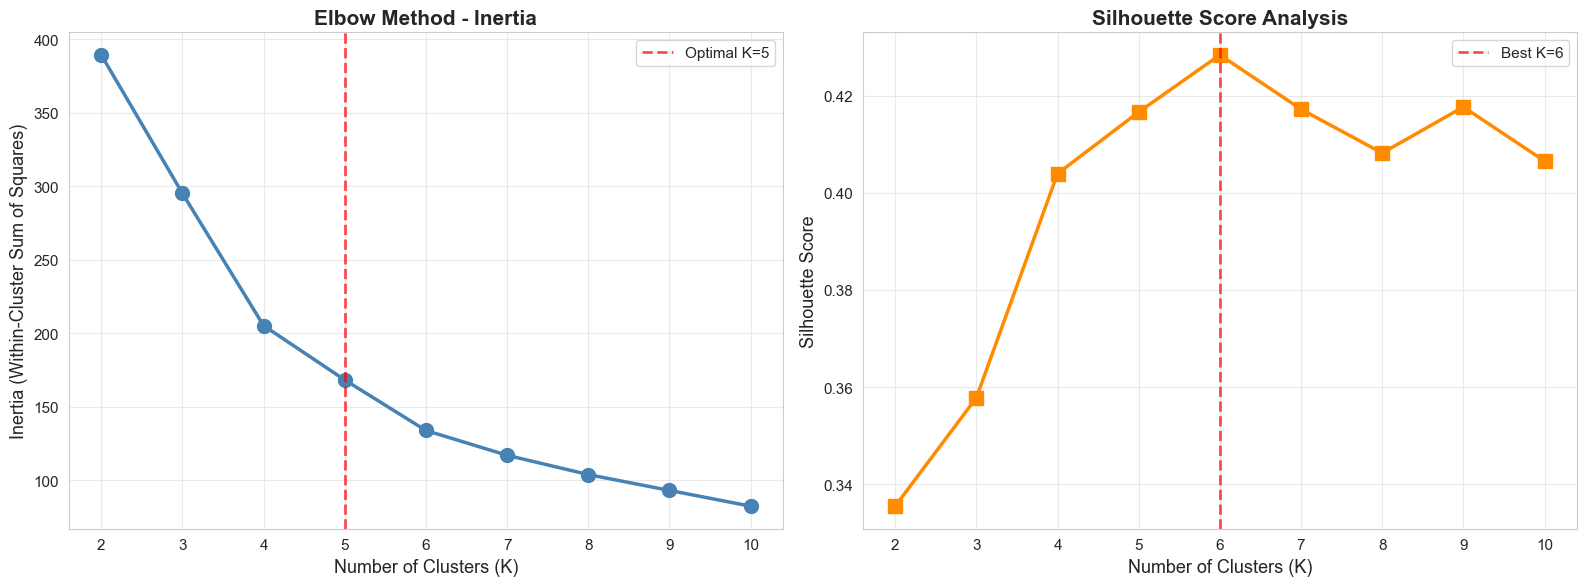


✅ Based on Elbow Method: Optimal K = 5
✅ Based on Silhouette Score: Best K = 6


In [16]:
# Visualize Elbow Method
# =========================================
# Create figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 1. Elbow Curve (Inertia)
ax1.plot(K_range, inertia_values, marker='o', linewidth=2.5, markersize=10, color='steelblue')
ax1.set_xlabel('Number of Clusters (K)', fontsize=13)
ax1.set_ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=13)
ax1.set_title('Elbow Method - Inertia', fontsize=15, weight='bold')
ax1.grid(alpha=0.4)
ax1.set_xticks(K_range)

# Mark the elbow point (K=5)
ax1.axvline(x=5, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Optimal K=5')
ax1.legend(fontsize=11)

# 2. Silhouette Score
ax2.plot(K_range, silhouette_scores, marker='s', linewidth=2.5, markersize=10, color='darkorange')
ax2.set_xlabel('Number of Clusters (K)', fontsize=13)
ax2.set_ylabel('Silhouette Score', fontsize=13)
ax2.set_title('Silhouette Score Analysis', fontsize=15, weight='bold')
ax2.grid(alpha=0.4)
ax2.set_xticks(K_range)

# Mark the best score
best_k = K_range[np.argmax(silhouette_scores)]
ax2.axvline(x=best_k, color='red', linestyle='--', linewidth=2, alpha=0.7, label=f'Best K={best_k}')
ax2.legend(fontsize=11)

plt.tight_layout()
plt.savefig('../outputs/elbow_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✅ Based on Elbow Method: Optimal K = 5")
print(f"✅ Based on Silhouette Score: Best K = {best_k}")

🤖 TRAINING K-MEANS MODEL
✅ K-Means trained with K=5
✅ Cluster labels assigned to 200 customers

📊 CLUSTER DISTRIBUTION
Cluster
0    20
1    54
2    40
3    39
4    47
Name: count, dtype: int64


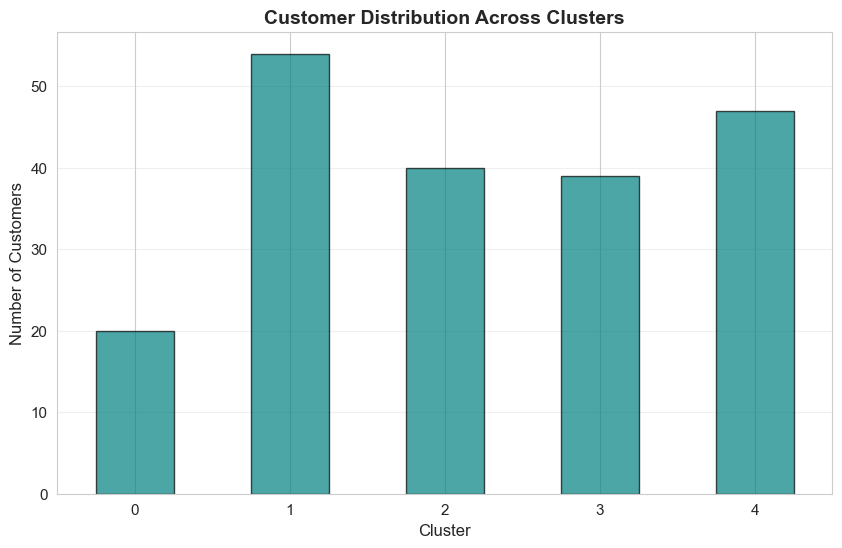

In [18]:
# Train K-Means Model (K=5)
# =========================================
print("=" * 60)
print("🤖 TRAINING K-MEANS MODEL")
print("=" * 60)

# Train final model with K=5
optimal_k = 5
kmeans_final = KMeans(
    n_clusters=optimal_k, 
    random_state=42, 
    n_init=10, 
    max_iter=300
)

# Fit and predict
cluster_labels = kmeans_final.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['Cluster'] = cluster_labels

print(f"✅ K-Means trained with K={optimal_k}")
print(f"✅ Cluster labels assigned to {len(df)} customers")

# Cluster distribution
print("\n" + "=" * 60)
print("📊 CLUSTER DISTRIBUTION")
print("=" * 60)
cluster_counts = df['Cluster'].value_counts().sort_index()
print(cluster_counts)

# Visualize cluster distribution
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', color='teal', edgecolor='black', alpha=0.7)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('Customer Distribution Across Clusters', fontsize=14, weight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.savefig('../outputs/cluster_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
# Cluster Characteristics
# =========================================
print("=" * 60)
print("📈 CLUSTER CHARACTERISTICS")
print("=" * 60)

# Group by cluster and calculate mean
cluster_stats = df.groupby('Cluster')[features].mean().round(2)
display(cluster_stats)

# Add cluster interpretation
print("\n" + "=" * 60)
print("💡 CLUSTER INSIGHTS")
print("=" * 60)

interpretations = {
    0: "Young, Low Income, Low Spending → Budget Shoppers",
    1: "Middle-aged, High Income, High Spending → Premium Customers (VIP)",
    2: "Young, High Income, Low Spending → Savers/Conservative Spenders",
    3: "Middle-aged, Low Income, High Spending → Impulse Buyers",
    4: "Older, Medium Income, Medium Spending → Practical Shoppers"
}

for cluster_id, description in interpretations.items():
    print(f"🔹 Cluster {cluster_id}: {description}")

# Save cluster stats
cluster_stats.to_csv('../outputs/cluster_statistics.csv')
print("\n✅ Cluster statistics saved to 'outputs/cluster_statistics.csv'")

📈 CLUSTER CHARACTERISTICS


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,46.25,26.75,18.35
1,25.19,41.09,62.24
2,32.88,86.10,81.53
3,39.87,86.10,19.36
4,55.64,54.38,48.85



💡 CLUSTER INSIGHTS
🔹 Cluster 0: Young, Low Income, Low Spending → Budget Shoppers
🔹 Cluster 1: Middle-aged, High Income, High Spending → Premium Customers (VIP)
🔹 Cluster 2: Young, High Income, Low Spending → Savers/Conservative Spenders
🔹 Cluster 3: Middle-aged, Low Income, High Spending → Impulse Buyers
🔹 Cluster 4: Older, Medium Income, Medium Spending → Practical Shoppers

✅ Cluster statistics saved to 'outputs/cluster_statistics.csv'


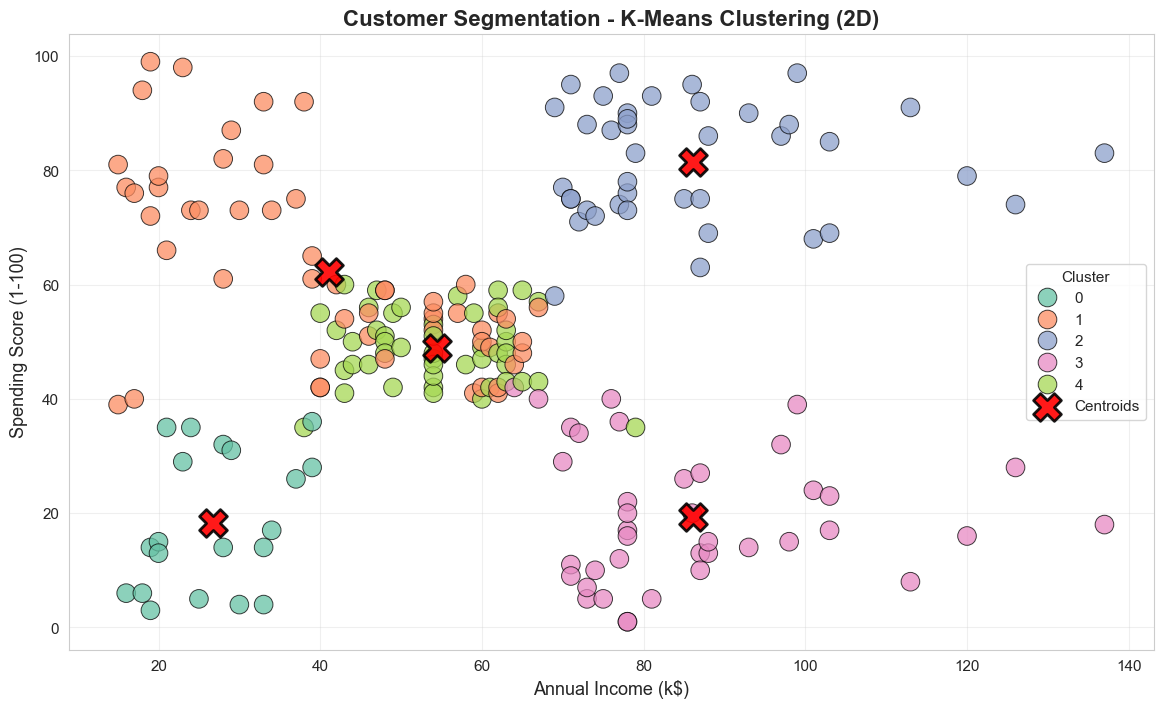

✅ 2D visualization saved!


In [20]:
# 2D Visualization (Income vs Spending)
# =========================================
plt.figure(figsize=(14, 8))

# Scatter plot with clusters
sns.scatterplot(
    x=df['Annual Income (k$)'], 
    y=df['Spending Score (1-100)'], 
    hue=df['Cluster'], 
    palette='Set2', 
    s=180, 
    alpha=0.75,
    edgecolor='black',
    linewidth=0.7
)

# Plot cluster centers
centers = scaler.inverse_transform(kmeans_final.cluster_centers_)
plt.scatter(
    centers[:, 1],  # Annual Income
    centers[:, 2],  # Spending Score
    c='red', 
    s=400, 
    alpha=0.9, 
    edgecolor='black', 
    linewidth=2,
    marker='X',
    label='Centroids'
)

plt.title('Customer Segmentation - K-Means Clustering (2D)', fontsize=16, weight='bold')
plt.xlabel('Annual Income (k$)', fontsize=13)
plt.ylabel('Spending Score (1-100)', fontsize=13)
plt.legend(title='Cluster', fontsize=11, loc='best')
plt.grid(alpha=0.3)
plt.savefig('../outputs/clusters_2D.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ 2D visualization saved!")

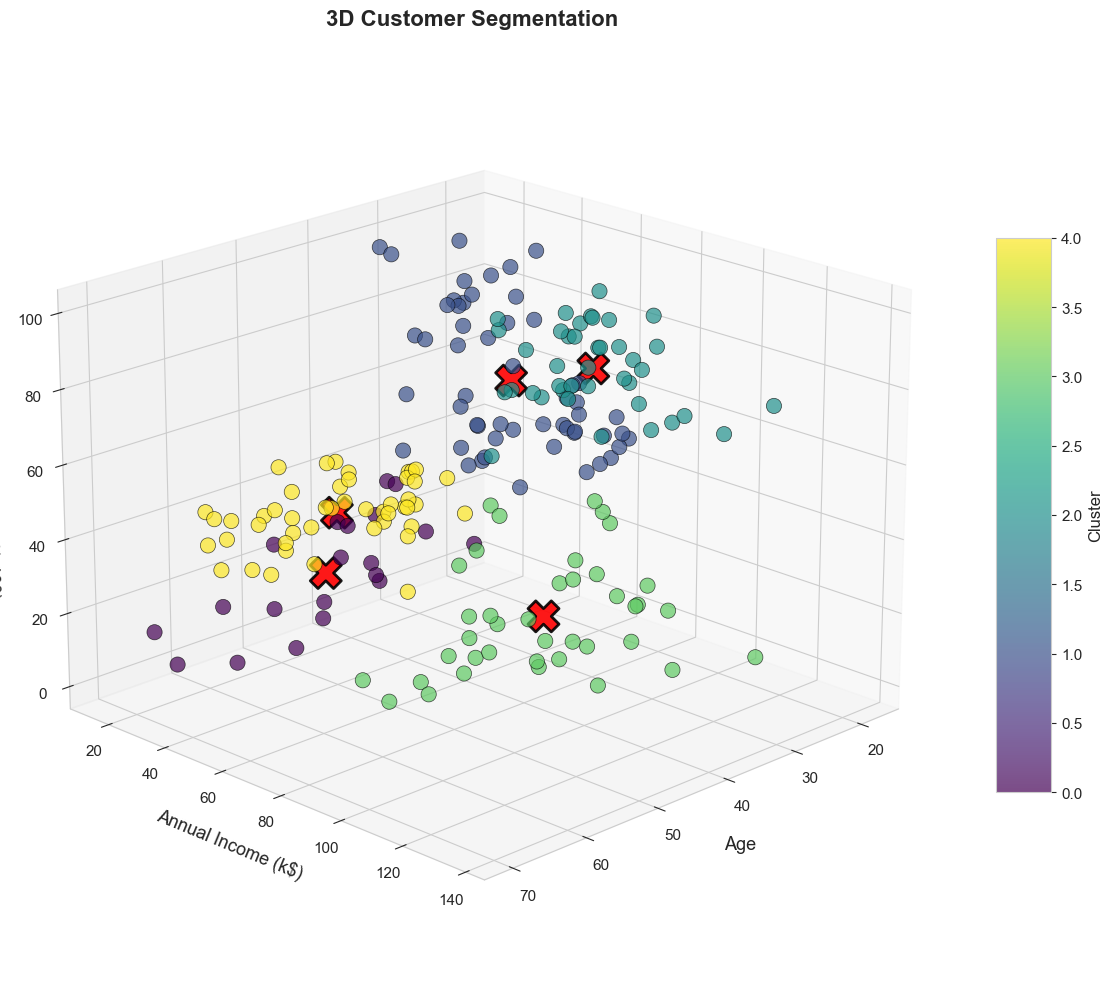

✅ 3D visualization saved!


In [21]:
# 3D Visualization (Age, Income, Spending)
# =========================================
# Create 3D plot
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(
    df['Age'], 
    df['Annual Income (k$)'], 
    df['Spending Score (1-100)'],
    c=df['Cluster'], 
    cmap='viridis', 
    s=120, 
    alpha=0.7,
    edgecolor='black',
    linewidth=0.5
)

# Plot centroids
ax.scatter(
    centers[:, 0],  # Age
    centers[:, 1],  # Income
    centers[:, 2],  # Spending
    c='red',
    s=500,
    alpha=0.9,
    edgecolor='black',
    linewidth=2,
    marker='X'
)

# Labels and title
ax.set_xlabel('Age', fontsize=13, labelpad=10)
ax.set_ylabel('Annual Income (k$)', fontsize=13, labelpad=10)
ax.set_zlabel('Spending Score (1-100)', fontsize=13, labelpad=10)
ax.set_title('3D Customer Segmentation', fontsize=16, weight='bold', pad=20)

# Colorbar
cbar = plt.colorbar(scatter, shrink=0.6, aspect=10)
cbar.set_label('Cluster', fontsize=12)

# View angle
ax.view_init(elev=20, azim=45)

plt.savefig('../outputs/clusters_3D.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ 3D visualization saved!")

In [22]:
# Final Summary & Export
# =========================================
print("=" * 60)
print(" PROJECT SUMMARY")
print("=" * 60)

print(f"""
✅ Dataset: Mall Customers
✅ Total Customers: {len(df)}
✅ Features Used: Age, Annual Income, Spending Score
✅ Algorithm: K-Means Clustering
✅ Optimal K: {optimal_k}
✅ Clusters Created: {optimal_k}

📂 Outputs Generated:
  - eda_visualizations.png
  - income_vs_spending.png
  - elbow_analysis.png
  - cluster_distribution.png
  - clusters_2D.png
  - clusters_3D.png
  - cluster_statistics.csv
  - clustered_customers.csv
""")

# Save final dataset with clusters
df.to_csv('../outputs/clustered_customers.csv', index=False)
print("\n✅ Final dataset with clusters saved to 'outputs/clustered_customers.csv'")

print("\n" + "=" * 60)
print("🚀 PROJECT COMPLETED SUCCESSFULLY!")
print("=" * 60)

 PROJECT SUMMARY

✅ Dataset: Mall Customers
✅ Total Customers: 200
✅ Features Used: Age, Annual Income, Spending Score
✅ Algorithm: K-Means Clustering
✅ Optimal K: 5
✅ Clusters Created: 5

📂 Outputs Generated:
  - eda_visualizations.png
  - income_vs_spending.png
  - elbow_analysis.png
  - cluster_distribution.png
  - clusters_2D.png
  - clusters_3D.png
  - cluster_statistics.csv
  - clustered_customers.csv


✅ Final dataset with clusters saved to 'outputs/clustered_customers.csv'

🚀 PROJECT COMPLETED SUCCESSFULLY!


In [25]:
# Save Model
# =========================================
import joblib

# Save the trained model
joblib.dump(kmeans_final, '../outputs/kmeans_model.pkl')
joblib.dump(scaler, '../outputs/scaler.pkl')

print("✅ Model saved to '../outputs/kmeans_model.pkl'")
print("✅ Scaler saved to '../outputs/scaler.pkl'")

✅ Model saved to '../outputs/kmeans_model.pkl'
✅ Scaler saved to '../outputs/scaler.pkl'
